In [2]:
from dotenv import load_dotenv
from pathlib import Path

# Load the environment variables file
load_dotenv(dotenv_path=Path().parent / ".env")

True

In [3]:
import os

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")
ROBOFLOW_MODEL_ID = os.getenv("ROBOFLOW_MODEL_ID")
ROBOFLOW_MODEL_VERSION = os.getenv("ROBOFLOW_MODEL_VERSION")
ROBOWFLOW_WORKSPACE = "north-of-60-labs-io4gr"
ROBOFLOW_PROJECT_ID = os.getenv("ROBOFLOW_PROJECT_ID")

In [4]:
print(ROBOFLOW_API_KEY)
print(ROBOFLOW_MODEL_ID)
print(ROBOFLOW_MODEL_VERSION)
print(ROBOWFLOW_WORKSPACE)
print(ROBOFLOW_PROJECT_ID)

5mvaZGpSPkdiqzPzUWr9
ish
3
north-of-60-labs-io4gr
ish


In [57]:
from roboflow import Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOWFLOW_WORKSPACE).project(ROBOFLOW_PROJECT_ID)
dataset = project.version(ROBOFLOW_MODEL_VERSION).download("coco")

loading Roboflow workspace...
loading Roboflow project...
Exporting format coco in progress : 85.0%
Version export complete for coco format



Extracting Dataset Version Zip to Ish-3 in coco:: 100%|██████████| 298/298 [00:00<00:00, 6688.05it/s]


In [58]:
from ultralytics import YOLO
model = YOLO('runs/pose/train/weights/best.pt')

data = Path() / "Ish-3" / "data.yaml"

results = model.train(data=data, epochs=50, imgsz=640)

Ultralytics 8.3.155 🚀 Python-3.11.9 torch-2.7.1 CPU (Apple M1 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Ish-3/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/pose/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, p

RuntimeError: Dataset 'Ish-3/data.yaml' error ❌ 'Ish-3/data.yaml' does not exist

In [5]:
from ultralytics import YOLO

model = YOLO('runs/pose/train/weights/best.pt')

In [112]:
model("resized_image.png")


image 1/1 /Users/scmitton/dev/ishboxing/models/resized_image.png: 640x640 1 face, 160.4ms
Speed: 1.2ms preprocess, 160.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'face'}
 obb: None
 orig_img: array([[[126, 162, 164],
         [129, 166, 168],
         [132, 168, 171],
         ...,
         [142, 193, 202],
         [141, 192, 201],
         [141, 192, 201]],
 
        [[125, 161, 163],
         [129, 165, 167],
         [127, 163, 166],
         ...,
         [141, 192, 201],
         [141, 192, 201],
         [141, 192, 201]],
 
        [[125, 161, 164],
         [126, 162, 165],
         [125, 161, 164],
         ...,
         [141, 192, 201],
         [141, 192, 201],
         [141, 191, 201]],
 
        ...,
 
        [[ 53,  45,  39],
         [ 56,  48,  42],
         [ 56,  48,  42],
         ...,
         [ 65,  49,  40],
         [ 55,  42,  32],
         [ 64,  49,  40]],
 
        [[ 54,  46,  42],
         [ 57,  48,  44],
         [ 55,  46,  

In [45]:
model.export(format="coreml")

Ultralytics 8.3.155 🚀 Python-3.11.9 torch-2.7.1 CPU (Apple M1 Pro)

PyTorch: starting from 'runs/pose/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 23, 8400) (6.1 MB)


scikit-learn version 1.7.0 is not supported. Minimum required version: 0.17. Maximum required version: 1.5.1. Disabling scikit-learn conversion API.
Torch version 2.7.1 has not been tested with coremltools. You may run into unexpected errors. Torch 2.5.0 is the most recent version that has been tested.



CoreML: starting export with coremltools 8.3.0...


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 156.42 passes/s]


CoreML: export success ✅ 16.8s, saved as 'runs/pose/train/weights/best.mlpackage' (6.1 MB)

Export complete (17.1s)
Results saved to /Users/scmitton/dev/ishboxing/models/runs/pose/train/weights
Predict:         yolo predict task=pose model=runs/pose/train/weights/best.mlpackage imgsz=640  
Validate:        yolo val task=pose model=runs/pose/train/weights/best.mlpackage imgsz=640 data=Ish-1/data.yaml  
Visualize:       https://netron.app


'runs/pose/train/weights/best.mlpackage'


image 1/1 /Users/scmitton/dev/ishboxing/ml/resized_IMG_4348.jpg: 640x640 1 face, 75.2ms
Speed: 1.3ms preprocess, 75.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
keypoints shape:  torch.Size([1, 6, 3]) keypoints:  tensor([[[342.4415, 323.3394,   0.9174],
         [298.7778, 325.5300,   0.9262],
         [306.6850, 300.0643,   0.9300],
         [292.2760, 445.0856,   0.9636],
         [329.1506, 447.2928,   0.9500],
         [284.4114, 447.4532,   0.9416]]])


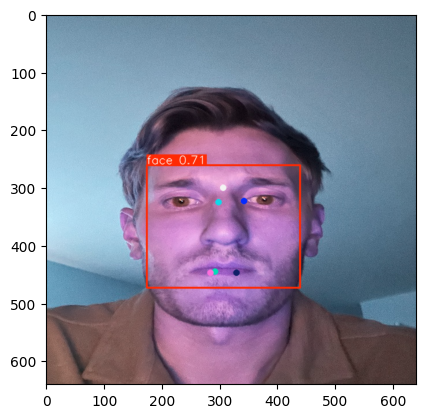

In [36]:

import matplotlib.pyplot as plt
import cv2

file = 'down-0002_png.rf.211db285704536049ef4ccecfa08df92.jpg'
image_path = "Ish-1/train/images/right-0010_png.rf.3b2495ae67bb0ae654c6c452d239ebae.jpg"
other_image = 'IMG_4348.jpg'

# Read and resize other_image to match image_path dimensions
target_img = cv2.imread(image_path)
target_size = target_img.shape[:2]

img = cv2.imread(other_image)
img = cv2.resize(img, (target_size[1], target_size[0]))
cv2.imwrite('resized_' + other_image, img)

results = model('resized_' + other_image)

print('keypoints shape: ', results[0].keypoints.data.shape, "keypoints: ", results[0].keypoints.data)

plt.imshow(results[0].plot())